<a href="https://colab.research.google.com/github/joshhmzhang/Machine-Learning-Kaggle-competition-Housing-price/blob/master/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Price Prediction

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Methodology](#methodology)
* [Exploratory Data Analysis](#analysis)
* [Modelling](#model)


## Part 1. Introduction<a name="introduction"></a>

The housing price has been booming during the past years. However, what are the deciding factors for the price of the house? How could potential buyers know what is the reasonable price? In this project, the detailed data analysis will be conducted to reavel the secreat of the pricing and the michine learning will be applied for the price prediction. The prediced results could be a valuable guide for the buyers in addition to the realeaste agent. The dataset is avaible from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data




## Part 2. Methodology <a name="methodology"></a>

First, the explortory analysis will be conducted to reveal the general information:
* Clean the dataset
* Investigate the relationship between the relevant features and the target 
* Articulate the findings using a deliverable with visualizations 
* Feature selection with ANOVA, Lasso regression and RFE for machine learning in the next step


Second step in our analysis will focus on modelling:
* Random Forest and XGBoost are applied.



## Part 3. Exploratory Data Analysis<a name="analysis"></a>


In [ ]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import f_oneway

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Display all columns
pd.options.display.max_columns=None
home_data = pd.read_csv('train.csv')
home_data_competition=pd.read_csv('test.csv')

home_data.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
home_data_competition.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
print('The traning data shape:')
print(home_data.shape)

print('The competition data shape:')
print(home_data_competition.shape)


The traning data shape:
(1460, 81)
The competition data shape:
(1459, 80)


In [ ]:
# statistics for numerical features
home_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


There are some outliers and there are a lot variance between max and min values. We will use standard sacle to transform the data.

In [ ]:
# statistics for categorical features
home_data.describe(exclude='number')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


### 3.1 Analyse the target: SalePrice

In [ ]:
home_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

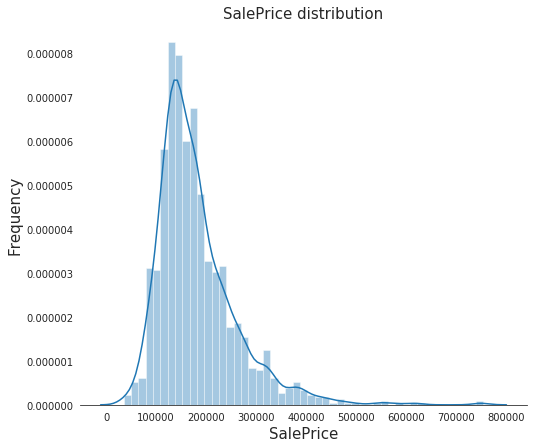

In [ ]:
sns.set_style("white")               #separate each bar
plt.subplots(figsize=(8, 7))         #set figure size
sns.distplot(home_data['SalePrice'])
plt.ylabel("Frequency",fontsize=15)
plt.xlabel("SalePrice",fontsize=15)
plt.title("SalePrice distribution",fontsize=15)
sns.despine(left=True)               #remove the frame


In [ ]:
#skewness and kurtosis
print("Skewness:{}".format(home_data['SalePrice'].skew()))
print("Kurtosis:{}".format(home_data['SalePrice'].kurt()))

Skewness:1.8828757597682129
Kurtosis:6.536281860064529


In [ ]:
home_data['SalePrice'].isnull().sum()

0

1 There is no missing values from the target.
2 The Sale price is right skewed, need to be converted to normal distribution when do the ML

In [ ]:
home_data['SalePrice']=np.log1p(home_data['SalePrice'])

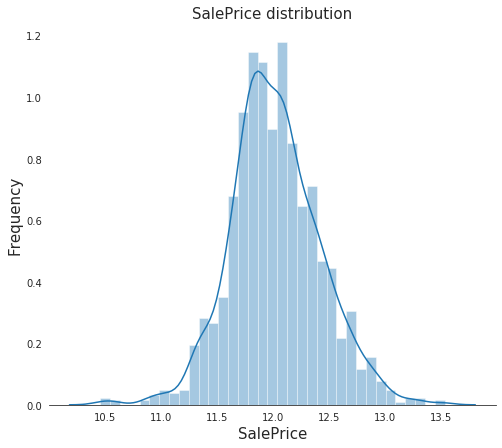

In [ ]:
sns.set_style("white")               #separate each bar
plt.subplots(figsize=(8, 7))         #set figure size
sns.distplot(home_data['SalePrice'])
plt.ylabel("Frequency",fontsize=15)
plt.xlabel("SalePrice",fontsize=15)
plt.title("SalePrice distribution",fontsize=15)
sns.despine(left=True)               #remove the frame


### 3.2 Explore numerical and categorical features

In [ ]:
#group numeric features
numeric=home_data.select_dtypes(include=(np.number)).columns
print(numeric)
print("There are {} numeric features".format(len(numeric)))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
There are 38 numeric features


In [ ]:
#group categorical features
categ=home_data.select_dtypes(exclude=(np.number)).columns
#convert "object" to "category"
home_data[categ]=home_data[categ].astype('category')
print(categ)
print("There are {} category features".format(len(categ)))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
There are 43 category features


### * Numeric Features -vs SalePrice

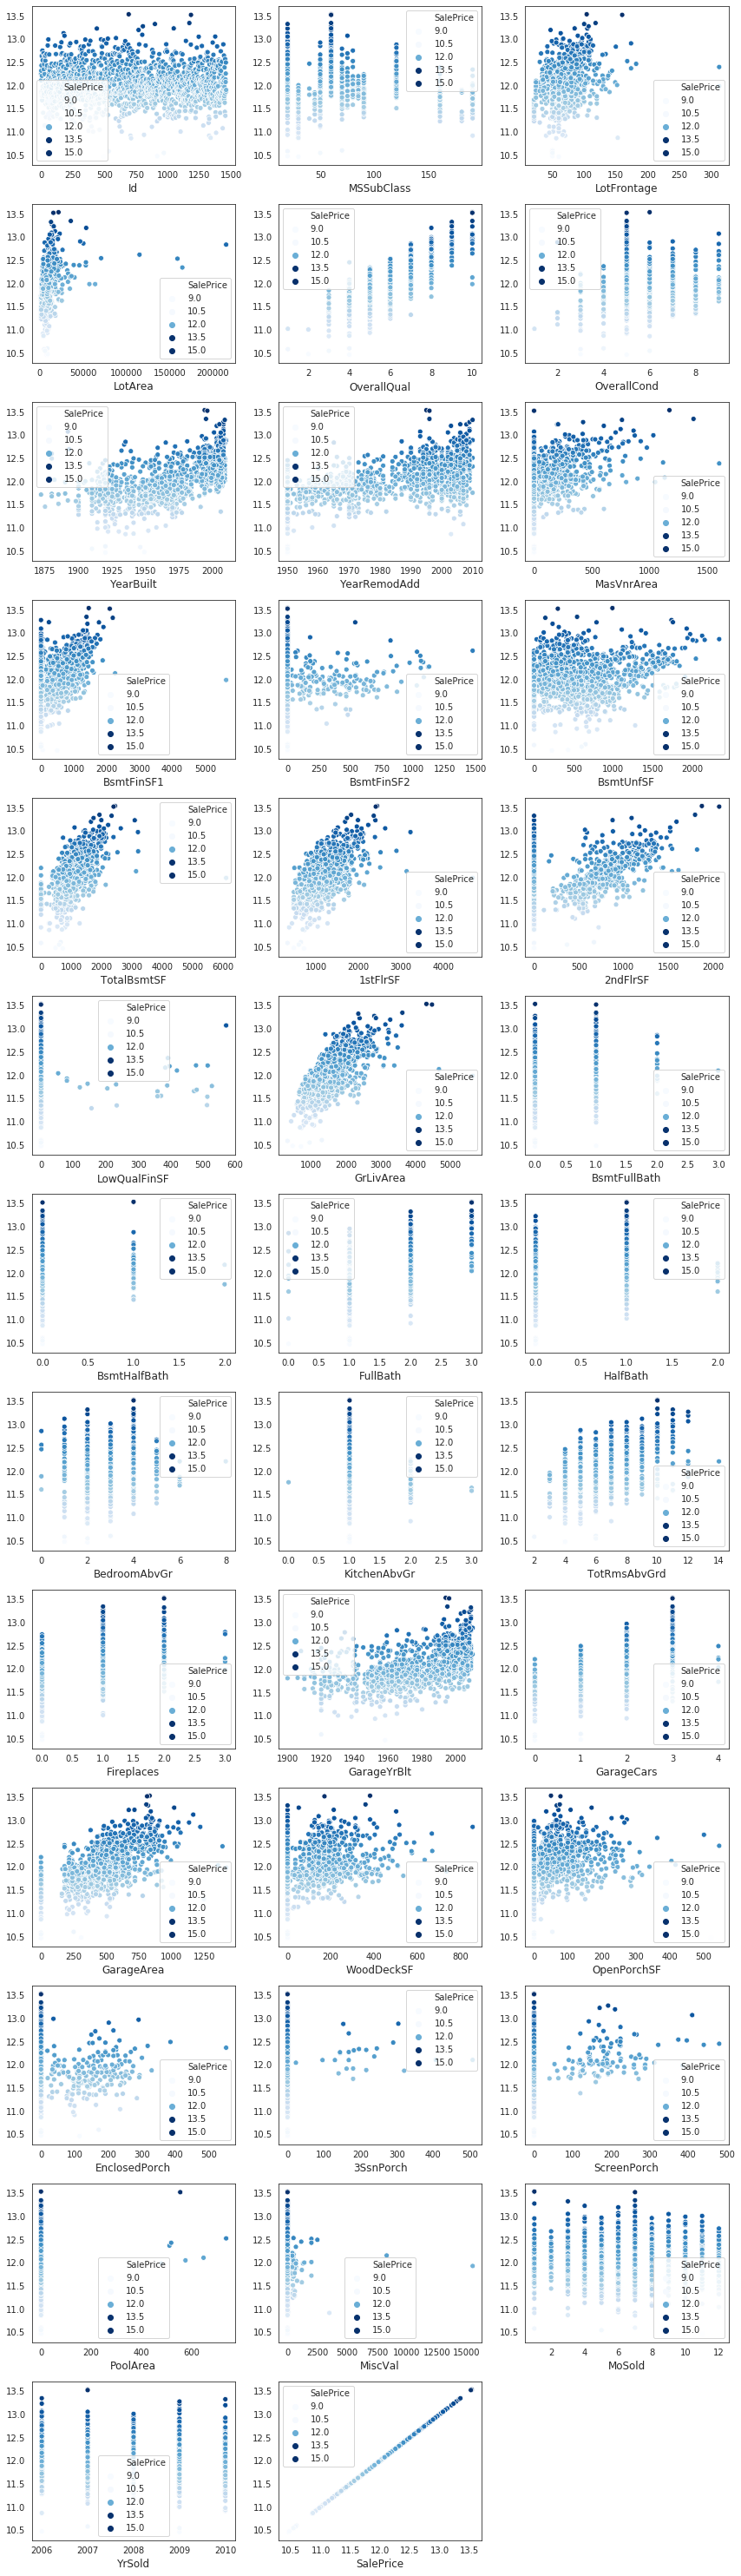

In [ ]:
# visualising numerical features vs SalePrice   
plt.subplots(figsize=(12, 120))
#plt.subplots_adjust(hspace=0.3,wspace=0.2,right=2,top=1)
for i, feature in enumerate(home_data[numeric], 1):      #enumerate:print index and the relevant value ,star from 1
    plt.subplot(len(numeric), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=home_data)    
    plt.xlabel('{}'.format(feature), fontsize=12)
    plt.ylabel('')
    plt.legend(loc='best',prop={'size': 10})
plt.tight_layout()        
plt.show()

### * Numeric Features - Distribution

In [ ]:
#Distributions of numerical features
f=pd.melt(home_data[numeric],value_vars=sorted(numeric))
f.head()


,variable,value
0,1stFlrSF,856.0
1,1stFlrSF,1262.0
2,1stFlrSF,920.0
3,1stFlrSF,961.0
4,1stFlrSF,1145.0


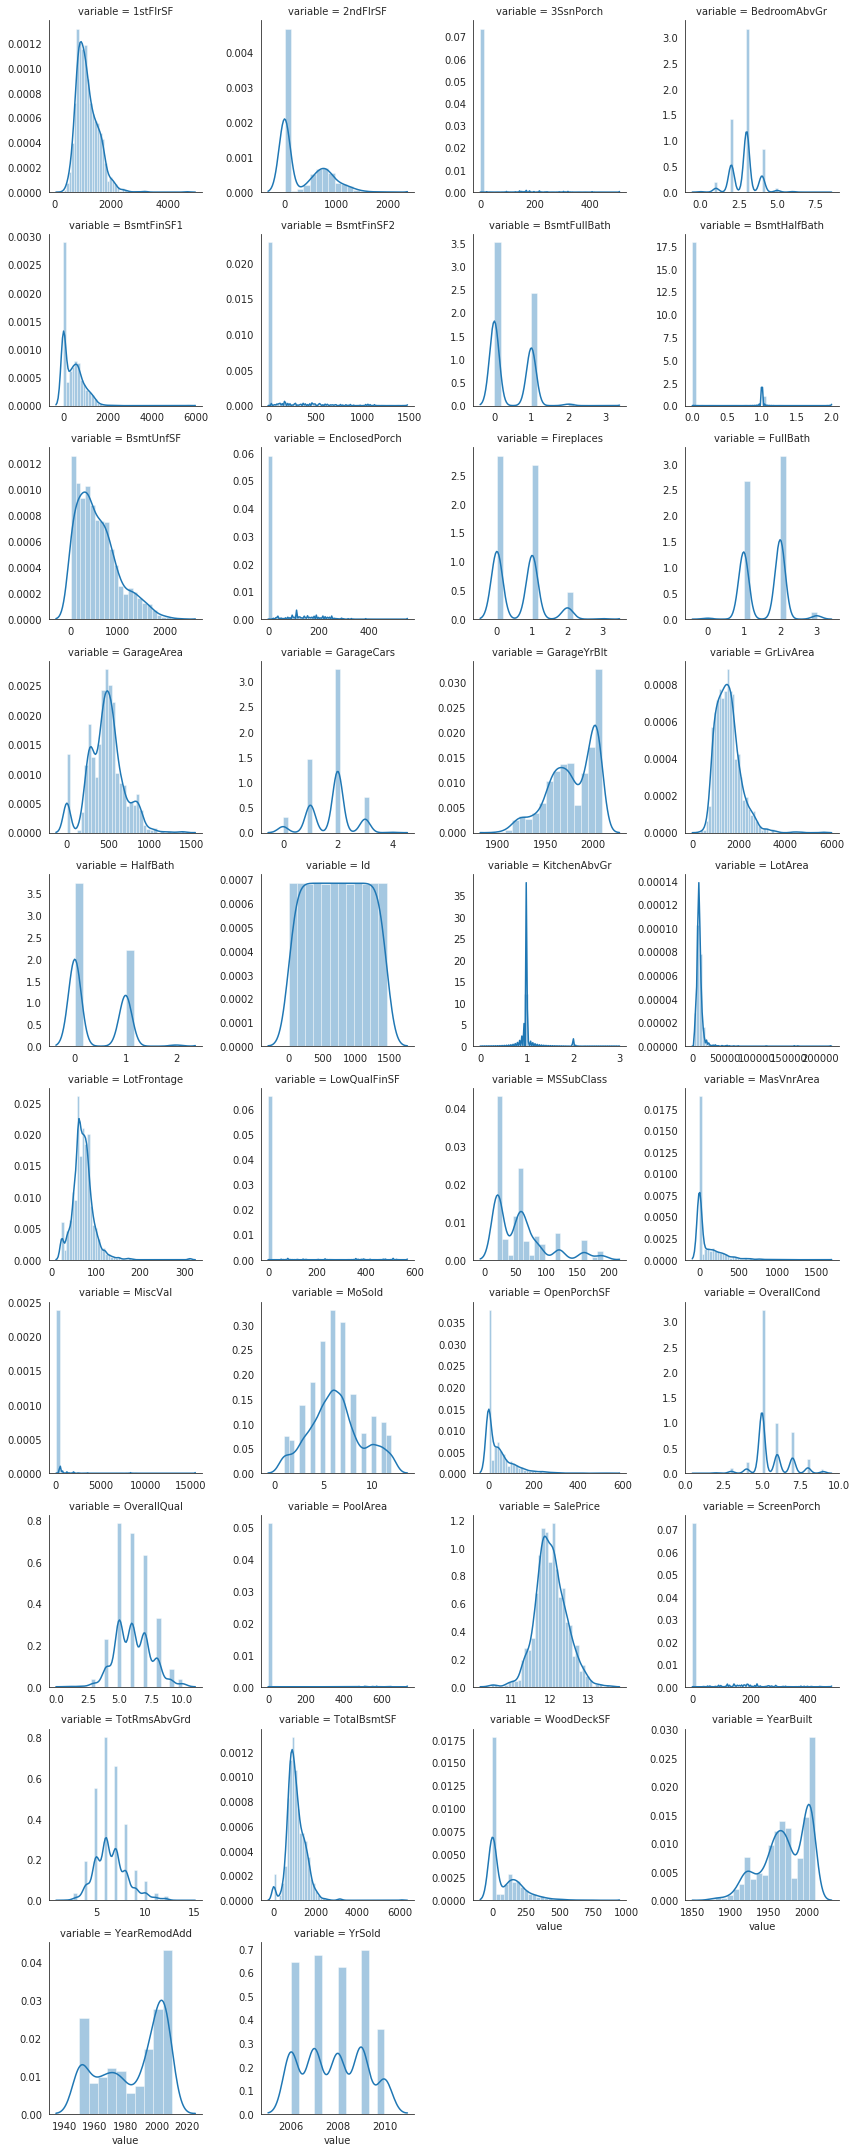

In [ ]:
g=sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
g=g.map(sns.distplot,'value')

There are some independent variables look like good candidates for log transformation: TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea, GarageArea 1stFlrSF and FrLivArea. 

### * Numeric Features - Remove the one with less variance

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


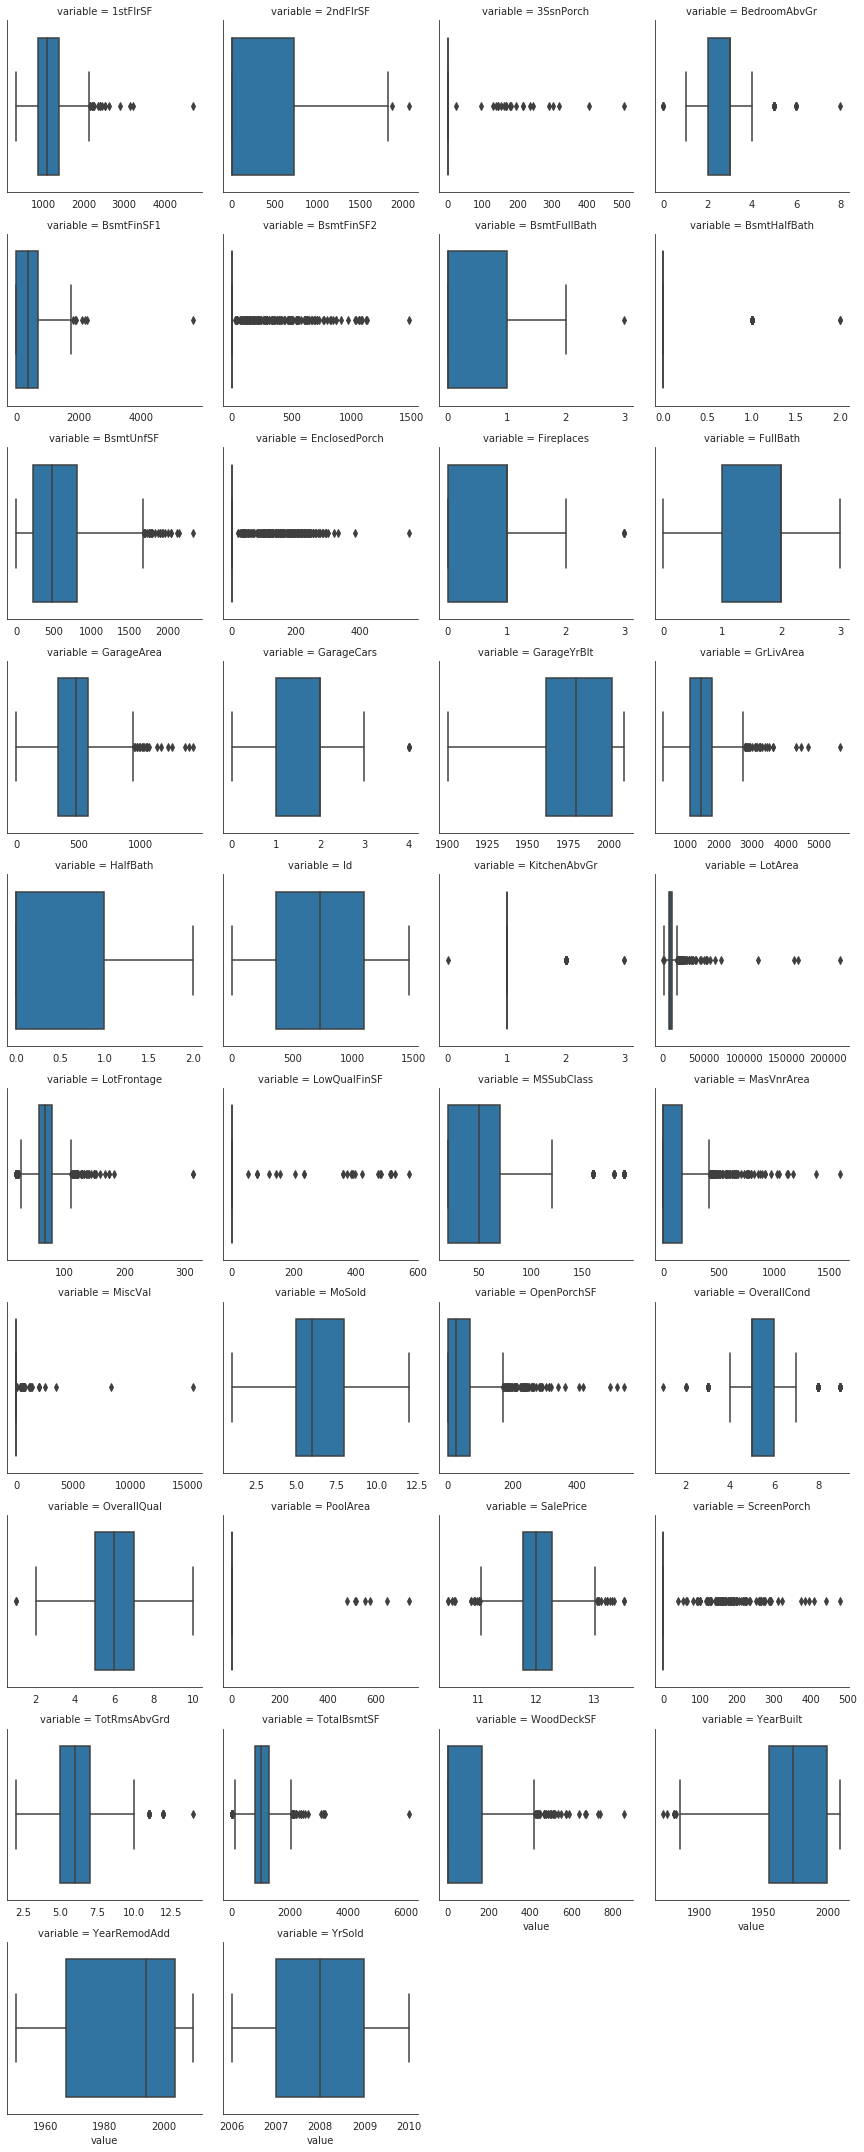

In [ ]:
g=sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
g=g.map(sns.boxplot,'value')

In [ ]:
from sklearn.feature_selection import VarianceThreshold
# normalise the numerical features
normalised_df=home_data[numeric]/home_data[numeric].mean()
normalised_df.var()

Id               3.331052e-01
MSSubClass       5.527258e-01
LotFrontage      1.201854e-01
LotArea          9.007445e-01
OverallQual      5.141384e-02
OverallCond      3.983737e-02
YearBuilt        2.347503e-04
YearRemodAdd     1.081894e-04
MasVnrArea       3.049585e+00
BsmtFinSF1       1.056953e+00
BsmtFinSF2       1.201008e+01
BsmtUnfSF        6.068044e-01
TotalBsmtSF      1.721246e-01
1stFlrSF         1.105645e-01
2ndFlrSF         1.582650e+00
LowQualFinSF     6.921292e+01
GrLivArea        1.202325e-01
BsmtFullBath     1.488359e+00
BsmtHalfBath     1.722041e+01
FullBath         1.239093e-01
HalfBath         1.725123e+00
BedroomAbvGr     8.099511e-02
KitchenAbvGr     4.432396e-02
TotRmsAbvGrd     6.218903e-02
Fireplaces       1.105935e+00
GarageYrBlt      1.557248e-04
GarageCars       1.788437e-01
GarageArea       2.043381e-01
WoodDeckSF       1.768719e+00
OpenPorchSF      2.016305e+00
EnclosedPorch    7.750379e+00
3SsnPorch        7.393410e+01
ScreenPorch      1.370566e+01
PoolArea  

Except the feature with the "year" which should be category features, no other numerical features with too samll variance

In [ ]:
#the code to remove features with less variance
#sel=VarianceThreshold(threshold=0.005)
#sel.fit(normalised_df)
#mask=sel.get_support()
#reduced_df=home_data[numeric].loc[:,mask]

### * Numeric Features - Heatmap to visualize the correlation matrix and remove the features with high correlationship

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5]), <a list of 37 Text yticklabel objects>)

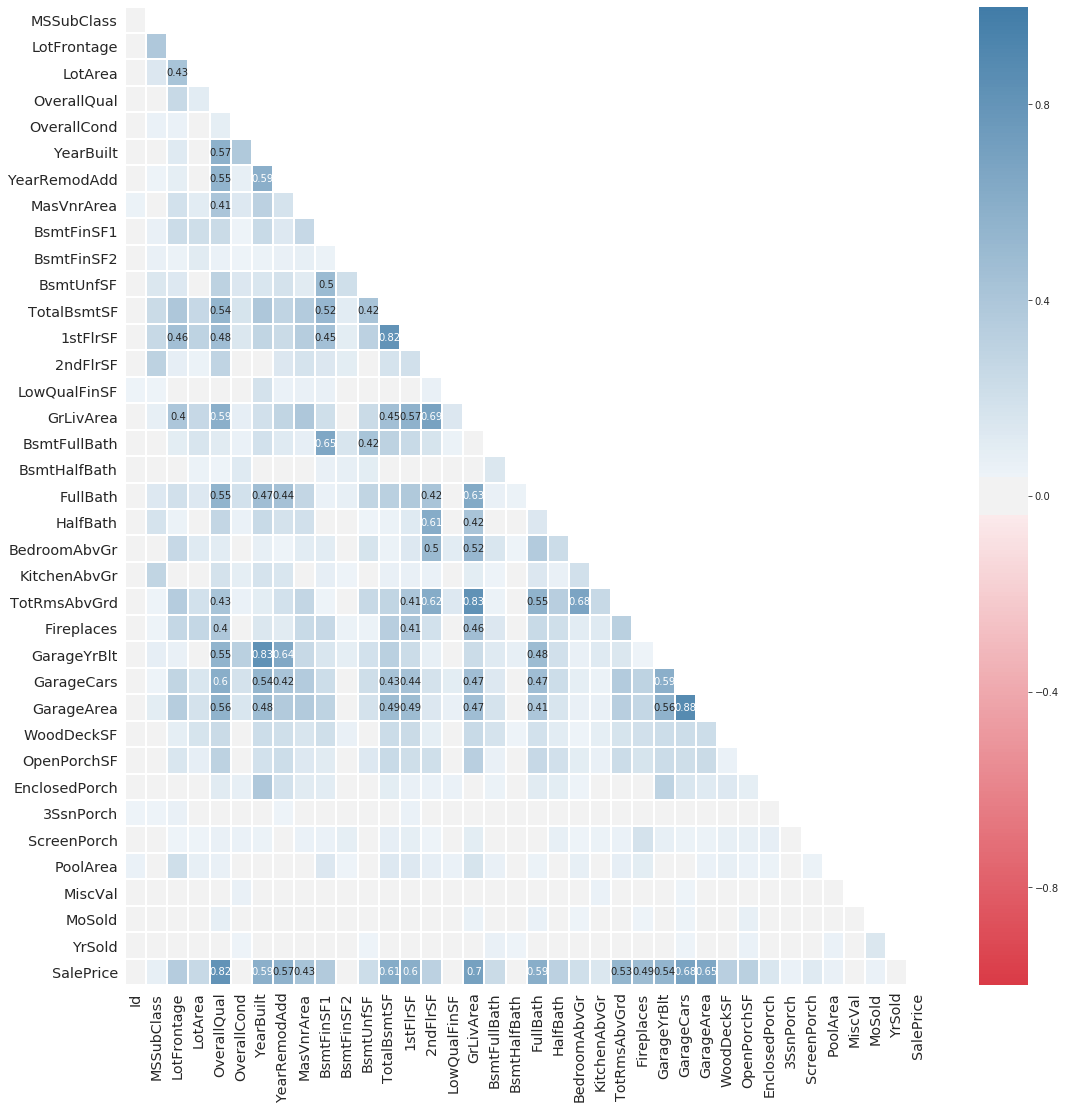

In [ ]:
# create a triangular mask to avoid repeated values 
# and make the plot easier to read
corr = home_data[numeric].corr().iloc[1:]
cmap=sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
mask = np.triu(np.ones_like(corr), k=1)

plt.figure(figsize=(18,18))
ax=sns.heatmap(abs(corr), center=0, vmin=-1, vmax=1, cmap=cmap,linewidths=1, mask=mask,annot=True, fmt='.2f')  #cmap='RdBu' 
# format the text in the plot to make it easier to read
for text in ax.texts:
    t = float(text.get_text())
    if -0.8 < t < 0.4:
        text.set_text('')
    else:
        text.set_text(round(t, 2))
plt.xticks(rotation=90,size='x-large')
plt.yticks(rotation=0,size='x-large')


The heatmap shows there are some features that have the corelation as high as 0.8: 1stFlrSF & TotalBsmtSF; GarageYrBlt & YearBuilt; TotRmsAbvGrd & GrLivArea ; GarageArae & GarageCars

GarageYrBlt & YearBuilt: since GarageYrBlt has some null, and close related to YearBuilt, I will remove the GarageYrBlt.

TotRmsAbvGrd (Total rooms above ground (does not include bathrooms)) & GrLivArea( Above ground living area square feet) : we may combine them to a new feature "avg room size"

GarageArae & GarageCars: from the scatter plot below, we can see in some cases, people park fewer cars in larger garage, so we reomve the GarageCars 

### * Categorcal Features - Boxplot

In [ ]:
f=pd.melt(home_data,id_vars='SalePrice',value_vars=sorted(categ))
f.head()

,SalePrice,variable,value
0,12.247699,Alley,NaN
1,12.109016,Alley,NaN
2,12.317171,Alley,NaN
3,11.849405,Alley,NaN
4,12.429220,Alley,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


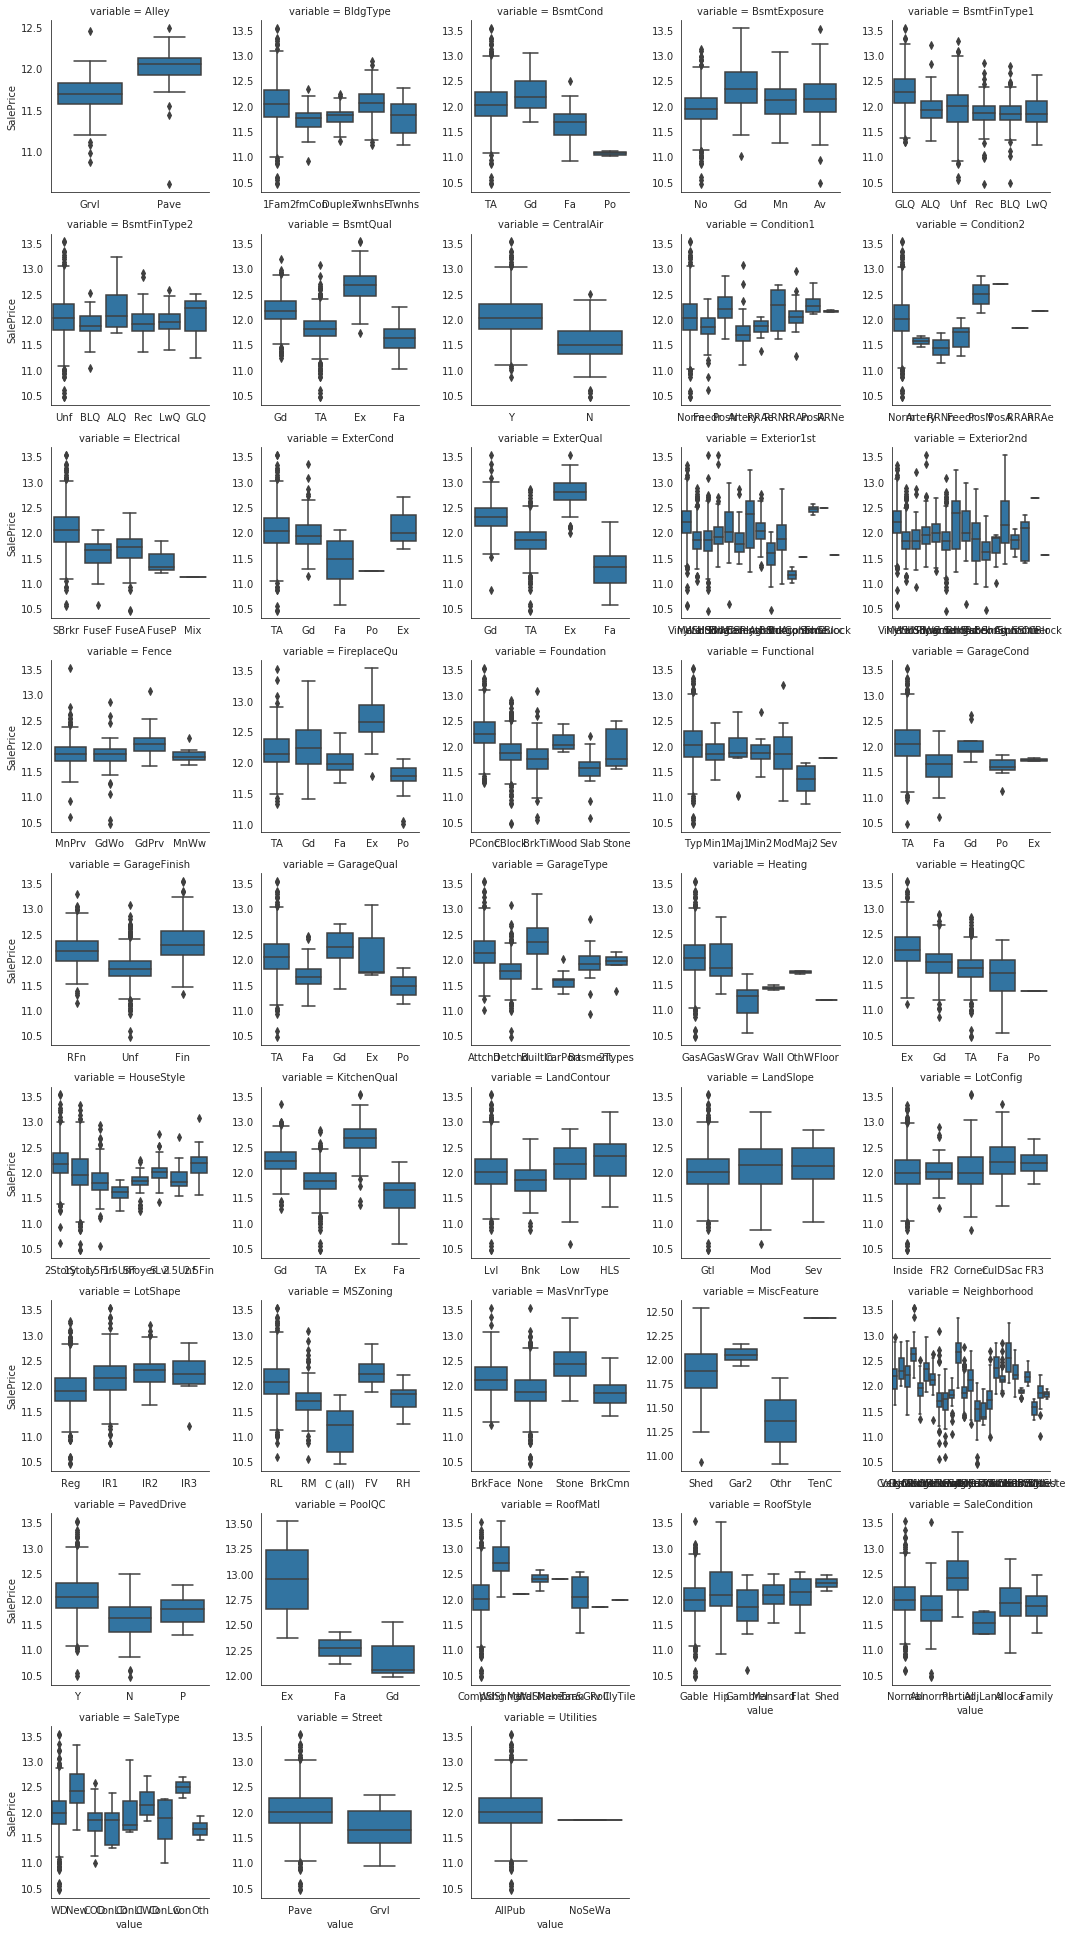

In [ ]:
g=sns.FacetGrid(f,col='variable',col_wrap=5,sharex=False,sharey=False)
g=g.map(sns.boxplot,'value','SalePrice')
g.fig.tight_layout()

Some Categorical features have great effect on the saleprice: BsmtQual,Condition2,Neighborhood and others

### * Categorical Features - ANOVA

In [ ]:
# fillna with 'missing' since ANOVA will have error for NaN
home_data_anova=home_data.copy()
for cat in categ:
    home_data_anova[cat] = home_data_anova[cat].cat.add_categories('Missing').fillna('Missing')

# fit ANOVA    
anova={'feature':[],'f':[],'p':[]}
for cat in categ:
    group_price=[]
    for group in home_data_anova[cat].unique():
        group_price.append(home_data_anova[home_data_anova[cat]==group]['SalePrice'].values)
    f,p=f_oneway(*group_price)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova=pd.DataFrame(anova,columns=['feature','f','p'])
anova.sort_values('p',inplace=True)

categ_anova=anova.head(20).feature.values
categ_anova

array(['Neighborhood', 'ExterQual', 'BsmtQual', 'KitchenQual',
       'GarageFinish', 'GarageType', 'FireplaceQu', 'Foundation',
       'HeatingQC', 'BsmtFinType1', 'MasVnrType', 'MSZoning',
       'Exterior1st', 'Exterior2nd', 'GarageCond', 'BsmtExposure',
       'GarageQual', 'CentralAir', 'SaleCondition', 'SaleType'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

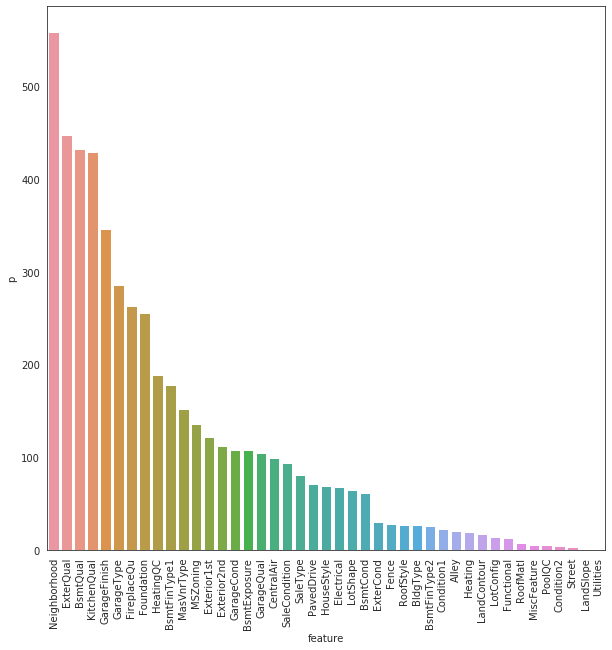

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(anova['feature'],np.log(1./anova['p']))  ## transfer p for better visualisation
plt.xticks(rotation=90)


Here is ANOVA analysis on the influence of categorical variable on SalePrice. The test shows the same results to boxplot

### 3.3 Feature Engineering 

In [ ]:
home_data.shape

(1460, 81)

In [ ]:
home_data_competition.shape

(1459, 80)

In [ ]:
#concatenate the train and test data in the same dataframe
ntrain = home_data.shape[0]
y = home_data['SalePrice'].values
ntest = home_data_competition.shape[0]
all_data = pd.concat((home_data, home_data_competition),sort=False).reset_index(drop=True)
all_data.drop(['SalePrice','Id'], axis=1, inplace=True)
print("All_data size is : {}".format(all_data.shape))

All_data size is : (2919, 79)


### * Numeric Feature - Feature Generation

In [ ]:
#update numeric columns
numeric=all_data.select_dtypes(include='number').columns
all_data[numeric].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008


In [ ]:
#1stFlrSF 2ndFlrSF GrLivArea
(all_data['1stFlrSF']+all_data['2ndFlrSF']==all_data.GrLivArea).sum()/len(all_data)

0.986296676944159

98% data shows the TotalBsmtSF is the sum of BsmtFinSF1	and BsmtUnfSF.	


In [ ]:
# drop "1stFlrSF", "2ndFlrSF"
all_data.drop(["1stFlrSF", "2ndFlrSF"],axis=1,inplace=True)

In [ ]:
#BsmtFinSF1,BsmtUnfSF, BsmtFinSF2, TotalBsmtSF
(all_data.BsmtFinSF1+all_data.BsmtUnfSF+all_data.BsmtFinSF2==all_data.TotalBsmtSF).sum()/len(all_data)

0.999657416923604

100% data shows the TotalBsmtSF is the sum of BsmtFinSF1,BsmtFinSF2	and BsmtUnfSF.

In [ ]:
# drop "BsmtFinSF1","BsmtUnfSF","BsmtFinSF2"
all_data.drop(["BsmtFinSF1","BsmtUnfSF","BsmtFinSF2"],axis=1,inplace=True)

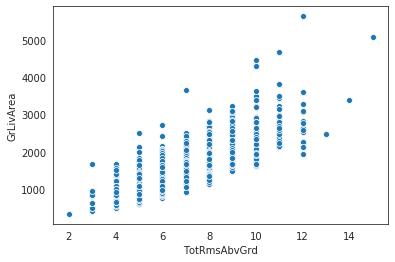

In [ ]:
#TotRmsAbvGrd, GrLivArea
sns.scatterplot(x='TotRmsAbvGrd',y='GrLivArea',data=all_data)

In [ ]:
# create new feature: average room size
all_data['avg_size_room']=all_data.GrLivArea/all_data.TotRmsAbvGrd
all_data.drop(['GrLivArea','TotRmsAbvGrd'],axis=1,inplace=True)

In [ ]:
all_data['avg_size_room'].dtypes

dtype('float64')

In [ ]:
# BsmtFullBath BsmtHalfBath FullBath HalfBath create new feature: total Bath
all_data['totlbath']=all_data.BsmtFullBath+all_data.BsmtHalfBath+all_data.FullBath+all_data.HalfBath
all_data.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'],axis=1,inplace=True)

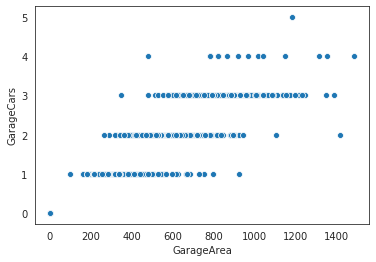

In [ ]:
#'GarageArea','GarageCars','GarageYrBlt'
sns.scatterplot(x='GarageArea',y='GarageCars',data=all_data)

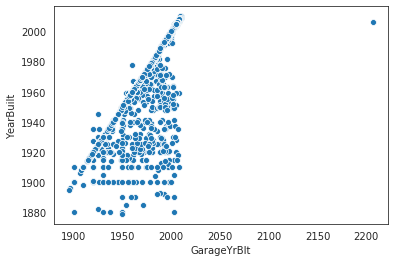

In [ ]:
sns.scatterplot(x='GarageYrBlt',y='YearBuilt',data=all_data)

Wrong data is found here: "Garage built year" should not be 2200

In [ ]:
all_data[all_data.GarageYrBlt>2050]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,avg_size_room,totlbath
2592,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1546.0,GasA,Ex,Y,SBrkr,0,2,1,Ex,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial,260.666667,2.0


In [ ]:
all_data[all_data.GarageYrBlt>2050].replace(2207.0,2007.)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,avg_size_room,totlbath
2592,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1546.0,GasA,Ex,Y,SBrkr,0,2,1,Ex,Typ,1,Gd,Attchd,2007.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial,260.666667,2.0


In [ ]:
# drop "GarageCars"
all_data.drop(['GarageCars',],axis=1,inplace=True)

In [ ]:
# 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'; create new feature: total porch
all_data['totlporch']=all_data.OpenPorchSF+all_data.EnclosedPorch+all_data['3SsnPorch']+all_data.ScreenPorch
all_data.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'],axis=1,inplace=True)

In [ ]:
#PoolArea; update numeric feature list
(all_data.PoolArea==0).sum()/len(all_data)

0.9955464200068517

Tere are 99% does ot have the pool and from the heatmap, we can see the crelation between pool and saleprice is weak, so we will drop it

In [ ]:
all_data.drop('PoolArea',axis=1,inplace=True)

In [ ]:
#'Year Remod/Add' , 'Year Built' , 'YrSold','GarageYrBlt'
all_data['years_until_built'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['years_until_remod']=all_data['YrSold'] - all_data['YearRemodAdd']

In [ ]:
all_data[['YearBuilt','YearRemodAdd','YrSold','years_until_built','years_until_remod']].head()

,YearBuilt,YearRemodAdd,YrSold,years_until_built,years_until_remod
0,2003,2003,2008,5,5
1,1976,1976,2007,31,31
2,2001,2002,2008,7,6
3,1915,1970,2006,91,36
4,2000,2000,2008,8,8


In [ ]:
all_data.drop(['YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)

In [ ]:
numeric=all_data.select_dtypes(include='number').columns
all_data[numeric].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,MiscVal,MoSold,avg_size_room,totlbath,totlporch,years_until_built,years_until_remod
0,60,65.0,8450,7,5,196.0,856.0,0,3,1,0,2003.0,548.0,0,0,2,213.750000,4.0,61,5,5
1,20,80.0,9600,6,8,0.0,1262.0,0,3,1,1,1976.0,460.0,298,0,5,210.333333,3.0,0,31,31
2,60,68.0,11250,7,5,162.0,920.0,0,3,1,1,2001.0,608.0,0,0,9,297.666667,4.0,42,7,6
3,70,60.0,9550,7,5,0.0,756.0,0,3,1,1,1998.0,642.0,0,0,2,245.285714,2.0,307,91,36
4,60,84.0,14260,8,5,350.0,1145.0,0,4,1,1,2000.0,836.0,192,0,12,244.222222,4.0,84,8,8


In [ ]:
print("There are {} out of 38 numeric features left".format(len(numeric)))

There are 21 out of 38 numeric features left


### * Numeric Feature -  Missing values 

In [ ]:
#find out if too many missing values
all_data[numeric].isnull().sum()[all_data[numeric].isnull().sum()>0]/len(all_data)

LotFrontage    0.166495
MasVnrArea     0.007879
TotalBsmtSF    0.000343
GarageYrBlt    0.054471
GarageArea     0.000343
totlbath       0.000685
dtype: float64

No features missing more than 20% values, so no feature will be droped

In [ ]:
# the code to remove features with 50% missing features
#mask=home_data[numeric].isnull().sum()/len(home_data)<0.5
#home_data[numeric]=home_data[numeric].loc[:,mask]

In [ ]:
#get the numerical columns with missing values 
num_missing_columns=all_data[numeric].isnull().sum()[all_data[numeric].isnull().sum()>0].index

In [ ]:
all_data[num_missing_columns].head()

,LotFrontage,MasVnrArea,TotalBsmtSF,GarageYrBlt,GarageArea,totlbath
0,65.0,196.0,856.0,2003.0,548.0,4.0
1,80.0,0.0,1262.0,1976.0,460.0,3.0
2,68.0,162.0,920.0,2001.0,608.0,4.0
3,60.0,0.0,756.0,1998.0,642.0,2.0
4,84.0,350.0,1145.0,2000.0,836.0,4.0


In [ ]:
#checing if having 0 values for these features
print('MasVnrArea:',sum(all_data['MasVnrArea']==0),'TotalBsmtSF:',sum(all_data['TotalBsmtSF']==0),
      'GarageArea:',sum(all_data['GarageArea']==0),'LotFrontage:',sum(all_data['LotFrontage']==0),
      'totlbath:',sum(all_data['totlbath']==0))


MasVnrArea: 1738 TotalBsmtSF: 78 GarageArea: 157 LotFrontage: 0 totlbath: 0


only 'totlbath' and 'LotFrontage' only conain Nan and donot have 0 value

In [ ]:
# totlbath; it is odd that a house without a bath
all_data[all_data.totlbath.isnull()][numeric]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,MiscVal,MoSold,avg_size_room,totlbath,totlporch,years_until_built,years_until_remod
2120,20,99.0,5940,4,7,0.0,NaN,0,2,1,0,1946.0,280.0,0,0,4,224.000000,NaN,0,62,58
2188,20,123.0,47007,5,7,0.0,0.0,0,5,1,2,1959.0,624.0,0,0,7,347.272727,NaN,372,49,12


In [ ]:
#since only 2 without the bath , we will fillna with median
all_data['totlbath']=all_data['totlbath'].fillna(all_data['totlbath'].median())


In [ ]:
#LotFrontage: Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood, 
#we can fill in missing values by the median LotFrontage of the neighborhood.
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
                          lambda x: x.fillna(x.median()))

In [ ]:
#'MasVnrArea','TotalBsmtSF','GarageArea' 
#except for LotFrontage and totlbath, all other features have 0, so replace nan with 0
all_data[['MasVnrArea','TotalBsmtSF','GarageArea','GarageYrBlt']]=\
          all_data[['MasVnrArea','TotalBsmtSF','GarageArea','GarageYrBlt']].fillna(0)

In [ ]:
all_data[numeric].isnull().sum().sum()

0

### * Categorical features

In [ ]:
#only pick 20 category features based on ANOVA
droped=list(set(categ)-set(categ_anova))
all_data.drop(droped,axis=1,inplace=True)

In [ ]:
categ=all_data.select_dtypes(exclude='number').columns
len(categ)

20

### * Categorical features - Missing values

In [ ]:

missing_counts=all_data[categ].isnull().sum()/all_data.shape[0]*100
missing_counts=missing_counts[missing_counts>0]
missing_counts.sort_values(ascending=False)
#print(loans.pub_rec_bankruptcies.value_counts(normalize=True, dropna=False))

FireplaceQu     48.646797
GarageCond       5.447071
GarageQual       5.447071
GarageFinish     5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType1     2.706406
MasVnrType       0.822199
MSZoning         0.137033
SaleType         0.034258
KitchenQual      0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
dtype: float64

In [ ]:
#drop all features with more than 40% missing values
all_data.drop(columns=['FireplaceQu'],inplace=True)

In [ ]:
categ=all_data.select_dtypes(exclude='number').columns

In [ ]:
all_data[categ].head()

,MSZoning,Neighborhood,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,GarageType,GarageFinish,GarageQual,GarageCond,SaleType,SaleCondition
0,RL,CollgCr,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Y,Gd,Attchd,RFn,TA,TA,WD,Normal
1,RL,Veenker,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,Y,TA,Attchd,RFn,TA,TA,WD,Normal
2,RL,CollgCr,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Y,Gd,Attchd,RFn,TA,TA,WD,Normal
3,RL,Crawfor,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Y,Gd,Detchd,Unf,TA,TA,WD,Abnorml
4,RL,NoRidge,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Y,Gd,Attchd,RFn,TA,TA,WD,Normal


In [ ]:
all_data[categ].isnull().sum()

MSZoning           4
Neighborhood       0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
ExterQual          0
Foundation         0
BsmtQual          81
BsmtExposure      82
BsmtFinType1      79
HeatingQC          0
CentralAir         0
KitchenQual        1
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
SaleType           1
SaleCondition      0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

missing_columns=all_data.isnull().sum()[all_data.isnull().sum()>0].index
# we inpute most_frequent to replace null values for all categorical features
imputer_median=SimpleImputer(missing_values= np.nan,strategy='most_frequent')
all_data[missing_columns]=imputer_median.fit_transform(all_data[missing_columns])

In [ ]:
all_data[categ].isnull().sum()

MSZoning         0
Neighborhood     0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
HeatingQC        0
CentralAir       0
KitchenQual      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
SaleType         0
SaleCondition    0
dtype: int64

### * Label Encoding - Ordinal Features

In [ ]:
ordcol=['ExterQual', 'BsmtQual','HeatingQC',
        'KitchenQual', 'GarageQual', 'GarageFinish','GarageCond', 'SaleCondition']

In [ ]:
#transfer all features to 'str', or labelencoding won't work because of NaN
all_data[ordcol]=all_data[ordcol].astype('str')

In [ ]:
#applied label encoding for ordinal features
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in ordcol:
    all_data[col]=label_encoder.fit_transform(all_data[col])


In [ ]:
all_data[ordcol].head()

,ExterQual,BsmtQual,HeatingQC,KitchenQual,GarageQual,GarageFinish,GarageCond,SaleCondition
0,2,2,0,2,4,1,4,4
1,3,2,0,3,4,1,4,4
2,2,2,0,2,4,1,4,4
3,3,3,2,2,4,2,4,0
4,2,2,0,2,4,1,4,4


In [ ]:
# update category features
categ=all_data.select_dtypes(exclude='number').columns


In [ ]:
all_data[categ].head()

,MSZoning,Neighborhood,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,CentralAir,GarageType,SaleType
0,RL,CollgCr,VinylSd,VinylSd,BrkFace,PConc,No,GLQ,Y,Attchd,WD
1,RL,Veenker,MetalSd,MetalSd,None,CBlock,Gd,ALQ,Y,Attchd,WD
2,RL,CollgCr,VinylSd,VinylSd,BrkFace,PConc,Mn,GLQ,Y,Attchd,WD
3,RL,Crawfor,Wd Sdng,Wd Shng,None,BrkTil,No,ALQ,Y,Detchd,WD
4,RL,NoRidge,VinylSd,VinylSd,BrkFace,PConc,Av,GLQ,Y,Attchd,WD


### * Label Encoding - Cardinality_columns

In [ ]:
for col in categ:
    print(col+':'+ str(all_data[col].nunique()))

MSZoning:5
Neighborhood:25
Exterior1st:15
Exterior2nd:16
MasVnrType:4
Foundation:6
BsmtExposure:4
BsmtFinType1:6
CentralAir:2
GarageType:6
SaleType:9


In [ ]:
# Get number of unique entries in each column with categorical data
nunique = list(map(lambda col: all_data[col].nunique(), categ))
d = dict(zip(categ, nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('CentralAir', 2),
 ('MasVnrType', 4),
 ('BsmtExposure', 4),
 ('MSZoning', 5),
 ('Foundation', 6),
 ('BsmtFinType1', 6),
 ('GarageType', 6),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

### * simple encoding with high_cardinality_cols

In [ ]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in categ if all_data[col].nunique() < 10]

# Columns that will be label encoded
high_cardinality_cols = list(set(categ)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['MSZoning', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'CentralAir', 'GarageType', 'SaleType']

Categorical columns that will be dropped from the dataset: ['Exterior2nd', 'Exterior1st', 'Neighborhood']


In [ ]:
# need to astype('str') since nan 
all_data[high_cardinality_cols]=all_data[high_cardinality_cols].astype('str')
for col in high_cardinality_cols:
    all_data[col]=label_encoder.fit_transform(all_data[col])


In [ ]:
all_data[high_cardinality_cols].head()

,Exterior2nd,Exterior1st,Neighborhood
0,13,12,5
1,8,8,24
2,13,12,5
3,15,13,6
4,13,12,15


### * one_hot encoding with low_cardinality_cols

In [ ]:
all_data_dum=pd.get_dummies(all_data)

In [ ]:
all_data_dum.shape

(2919, 74)

In [ ]:
all_data_dum.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,MiscVal,MoSold,SaleCondition,avg_size_room,totlbath,totlporch,years_until_built,years_until_remod,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,CentralAir_N,CentralAir_Y,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,65.0,8450,5,7,5,12,13,196.0,2,2,856.0,0,0,3,1,2,0,2003.0,1,548.0,4,4,0,0,2,4,213.750000,4.0,61,5,5,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,20,80.0,9600,24,6,8,8,8,0.0,3,2,1262.0,0,0,3,1,3,1,1976.0,1,460.0,4,4,298,0,5,4,210.333333,3.0,0,31,31,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,5,7,5,12,13,162.0,2,2,920.0,0,0,3,1,2,1,2001.0,1,608.0,4,4,0,0,9,4,297.666667,4.0,42,7,6,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,70,60.0,9550,6,7,5,13,15,0.0,3,3,756.0,2,0,3,1,2,1,1998.0,2,642.0,4,4,0,0,2,0,245.285714,2.0,307,91,36,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,15,8,5,12,13,350.0,2,2,1145.0,0,0,4,1,2,1,2000.0,1,836.0,4,4,192,0,12,4,244.222222,4.0,84,8,8,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
all_data_dum.isnull().sum().sum()

0

In [ ]:
all_data_dum = all_data_dum.apply(pd.to_numeric, errors='coerce')


In [ ]:
all_data_dum.dtypes

MSSubClass          int64
LotFrontage       float64
LotArea             int64
Neighborhood        int64
OverallQual         int64
                   ...   
SaleType_ConLI      uint8
SaleType_ConLw      uint8
SaleType_New        uint8
SaleType_Oth        uint8
SaleType_WD         uint8
Length: 74, dtype: object

### 3.4 Features selection with RFE

In [ ]:
# spit all_data to obtain the tainnig and test data
X = all_data_dum[0:ntrain]
competition = all_data_dum[ntrain:]

In [ ]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
# Applied cross validation to test the model
def rmse(model,X,y):
    cv_score=cross_val_score(model, X,y, scoring='neg_mean_squared_error',cv=10)
    final_score= np.mean(np.sqrt(np.abs(cv_score)))
    return final_score


### * LassoCV for features selection

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
lcv = LassoCV(cv=5)
lcv.fit(scaler.fit_transform(X_train), y_train) 
r_squared=lcv.score(scaler.fit_transform(X_test), y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

The model explains 86.1% of the test set variance


In [ ]:
lcv_mask = lcv.coef_ != 0 
# the number of features that have been picked
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

48 features out of 74 selected


### * Random Forest for features selection wrapping with RFE

In [ ]:
#sacle the data for RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
rfe_rf = RFE(estimator=RandomForestRegressor(), n_features_to_select=48, step=5, verbose=1)
rfe_rf.fit(scaler.fit_transform(X_train), y_train)
r_squared = rfe_rf.score(scaler.fit_transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))
rf_mask = rfe_rf.support_

Fitting estimator with 74 features.
Fitting estimator with 69 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 64 features.
Fitting estimator with 59 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 54 features.
Fitting estimator with 49 features.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The model can explain 83.7% of the variance in the test set


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### * Gradient Boosting for feature selection wrapping with RFE


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
rfe_gb = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=48, step=5, verbose=1)
rfe_gb.fit(scaler.fit_transform(X_train), y_train)
# Calculate the R squared on the test set
r_squared = rfe_gb.score(scaler.fit_transform(X_test),y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))
gb_mask = rfe_gb.support_

Fitting estimator with 74 features.
Fitting estimator with 69 features.
Fitting estimator with 64 features.
Fitting estimator with 59 features.
Fitting estimator with 54 features.
Fitting estimator with 49 features.
The model can explain 88.1% of the variance in the test set


### * Combine the feature selectors

In [ ]:
votes=np.sum([lcv_mask,rf_mask,gb_mask],axis=0)

In [ ]:
votes

array([3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 3, 3, 2,
       0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 0, 2, 3, 3, 2, 1, 1, 1, 1, 2, 2,
       0, 0, 0, 2, 3, 0, 3, 1, 1, 1, 1, 2, 3, 3, 3, 1, 2, 0, 2, 2, 3, 0,
       0, 1, 1, 1, 0, 2, 1, 2])

In [ ]:
mask=votes>2
reduced_X = X.loc[:, mask]

In [ ]:
print('There are {} picked out of {} numerical features '.format(np.sum(mask),len(votes)))

There are 33 picked out of 74 numerical features 


## Part 4. Modelling<a name="model"></a>

In [ ]:
# preparing the data
def norm(x):
  return (x-reduced_X.mean())/reduced_X.std()
norm_reduced_X=norm(reduced_X.copy())

In [ ]:
norm_reduced_X.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,BedroomAbvGr,KitchenQual,Fireplaces,GarageYrBlt,GarageFinish,GarageArea,WoodDeckSF,MoSold,SaleCondition,avg_size_room,totlbath,totlporch,years_until_built,years_until_remod,MSZoning_RL,MSZoning_RM,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_Unf,CentralAir_N,CentralAir_Y,GarageType_Detchd
0,0.073350,-0.230743,-0.207071,-1.205801,0.651256,-0.517023,0.513928,-0.777709,-0.324041,-0.459145,-0.884355,0.163723,-0.409229,-0.950901,0.295925,-0.281790,0.350880,-0.751918,-1.598563,0.208431,-0.383442,1.700736,-0.247978,-1.042902,-0.869643,0.517956,-0.418812,-0.317784,0.687703,-0.685544,-0.263722,0.263722,-0.600353
1,-0.872264,0.437901,-0.091855,1.953633,-0.071812,2.178881,-0.570555,0.663224,-0.324041,0.466305,-0.884355,0.163723,0.795356,0.600289,0.236414,-0.281790,-0.060710,1.625638,-0.488943,0.208431,-0.459809,0.616897,-0.827879,-0.183402,0.390007,0.517956,-0.418812,3.144637,-1.453120,-0.685544,-0.263722,0.263722,-0.600353
2,0.073350,-0.097014,0.073455,-1.205801,0.651256,-0.517023,0.325803,-0.777709,-0.324041,-0.313261,-0.884355,0.163723,-0.409229,0.600289,0.291517,-0.281790,0.631510,-0.751918,0.990552,0.208431,1.492193,1.700736,-0.428603,-0.976787,-0.821195,0.517956,-0.418812,-0.317784,-1.453120,-0.685544,-0.263722,0.263722,-0.600353
3,0.309753,-0.453625,-0.096864,-1.039515,0.651256,-0.517023,-0.570555,0.663224,0.832683,-0.687089,0.265385,0.163723,-0.409229,0.600289,0.284904,0.949987,0.790533,-0.751918,-1.598563,-3.425110,0.321418,-0.466941,2.090639,1.800059,0.632247,0.517956,-0.418812,-0.317784,0.687703,-0.685544,-0.263722,0.263722,1.664545
4,0.073350,0.616206,0.375020,0.457059,1.374324,-0.517023,1.366021,-0.777709,-0.324041,0.199611,-0.884355,1.389547,-0.409229,0.600289,0.289312,-0.281790,1.697903,0.779930,2.100173,0.208431,0.297647,1.700736,-0.029327,-0.943729,-0.724299,0.517956,-0.418812,-0.317784,-1.453120,-0.685544,-0.263722,0.263722,-0.600353


In [ ]:
#update X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(norm_reduced_X, y, test_size=0.3,random_state=1)

#update competition columns
picked_feature=reduced_X.columns
picked_feature

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'TotalBsmtSF',
       'HeatingQC', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'WoodDeckSF', 'MoSold', 'SaleCondition',
       'avg_size_room', 'totlbath', 'totlporch', 'years_until_built',
       'years_until_remod', 'MSZoning_RL', 'MSZoning_RM', 'BsmtExposure_Gd',
       'BsmtExposure_No', 'BsmtFinType1_Unf', 'CentralAir_N', 'CentralAir_Y',
       'GarageType_Detchd'],
      dtype='object')

### 4.1 Random Forest with Lasso features

In [ ]:
rf=RandomForestRegressor(random_state=1)
# to get hyperparameters
print(rf.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [ ]:
#model tunning: define the grid for hyperparameters "params_dt"
param_grid={
            'bootstrap': [True],
            'max_depth': [80, 90, 100],
            'max_features': ['log2', 'sqrt'],
            'min_samples_leaf': [ 3, 4, 5],
            'min_samples_split': [8, 10, 12],
            'n_estimators': [700]
            }
grid_rf=GridSearchCV(rf,cv=5,param_grid=param_grid,verbose=1,scoring='neg_mean_squared_error',n_jobs=-1) 

grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  4.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [8

In [ ]:
# Extract best hyperparameters from 'rf'
best_hypeparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hypeparams)

Best hyerparameters:
 {'bootstrap': True, 'max_depth': 80, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 700}


In [ ]:
# evaluate the performance
best_rf=grid_rf.best_estimator_
print('Random Forest -> Train MSE:{:.5f} | Test MSE:{:.5f}'.format(rmse(best_rf, X_train,y_train), 
                                                           rmse(best_rf, X_test,y_test)))

Random Forest -> Train MSE:0.15098 | Test MSE:0.16739


In [ ]:
#Random Forest -> Train MSE:0.15117 | Test MSE:0.16917

When reduce the features, the error increase, but the overfitting has been reduced

### 4.2 XGBoost with Lasso features



In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

print(xgb.get_params)

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)>


Parameter Tuning( n_estimators: 100-1000;early_stopping_rounds=5; learning_rate: 0.05-0.1;n_jobs=4

In [ ]:
#model tunning: define the grid for hyperparameters "params_dt"
from sklearn.model_selection import RandomizedSearchCV
#param_grid={
#            'subsample': np.arange(.05, 1, .05),
#            'max_depth': np.arange(3, 20, 1),
#            'colsample_bytree': np.arange(.1,1.05,.05),
##            'n_estimators': [100,300, 500],
#            'learning_rate':np.arange(0.01,0.1,0.01)
#            }
#'subsample': 0.7500000000000001, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.03, 'colsample_bytree': 0.7000000000000002
param_grid={
            'subsample': np.arange(.5, .75, .05),
            'max_depth': np.arange(4, 10, 1),
            'colsample_bytree': np.arange(.5,.75,.05),
            'n_estimators': [500],
            'learning_rate':np.arange(0.01,0.05,0.01)
            }
grid_xgb=RandomizedSearchCV(xgb,cv=5,param_distributions=param_grid,verbose=1,scoring='neg_mean_squared_error',n_jobs=-1,n_iter=10)  

grid_xgb.fit(X_train,y_train)

print('Best score from tunned XGBoost:{}'.format(grid_xgb.best_score_)) 

# Extract best hyperparameters from 'rf'
best_hypeparams = grid_xgb.best_params_
print('Best hyerparameters:\n', best_hypeparams)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   33.4s finished


[09:10:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score from tunned XGBoost:-0.017153866436627738
Best hyerparameters:
 {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.02, 'colsample_bytree': 0.6000000000000001}


In [ ]:
# evaluate the performance
best_xgb=grid_xgb.best_estimator_
print('XGBoost -> Train MSE:{:.5f} | Test MSE:{:.5f}'.format(rmse(best_xgb, X_train,y_train), 
                                                           rmse(best_xgb, X_test,y_test)))

[09:10:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:10:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:10:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:10:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:10:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:10:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:10:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:10:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

### 4.3 Ensemble models by weighted average

In [ ]:

#Lasso 
#pred_lesso=np.expm1(lasso.predict(competition))

#Radom forest
pred_rf=np.expm1(best_rf.predict(norm(competition[picked_feature])))

#XGBoost
pred_xgb=np.expm1(best_xgb.predict(norm(competition[picked_feature])))

#weighted average

finalpred=(pred_rf*0.4+pred_xgb*0.6)

#output for submission
output=pd.DataFrame({'Id':home_data_competition.Id,
                   'SalePrice':finalpred})
#output.to_csv('submission.csv',index=False)
#/content/drive/My Drive/Colab Notebooks/keras nova model feature .ipynb
output.to_csv('/content/drive/My Drive/Colab Notebooks/submission.csv',index=False)
